In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
a = np.random.uniform(0,100,(5,5))
a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [4]:
b = np.random.uniform(0,100,(5,1))
b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

# Placeholders

In [5]:
ph_a = tf.placeholder(tf.float32)
ph_b = tf.placeholder(tf.float32)

# Operations

In [6]:
add = ph_a + ph_b
mult = ph_a*ph_b

In [7]:
with tf.Session() as sess:
    add_result = sess.run(add, feed_dict={ph_a:a,ph_b:b})
    print(add_result)
    print('\n')
    
    mult_result = sess.run(mult, feed_dict={ph_a:a,ph_b:b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Example Neural Network 

In [8]:
n_features = 10
n_dense_neurons = 3

In [9]:
# placeholder for x
x = tf.placeholder(tf.float32, (None, n_features))

In [10]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]))

w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

## Operation Activation Function 

In [11]:
xW = tf.matmul(x,w)

In [12]:
z = tf.add(xW, b)

In [13]:
af = tf.sigmoid(z)

## Variable Initializer! 

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(af, feed_dict={x: np.random.random([1,n_features])})

In [16]:
print(layer_out)

[[ 0.53415531  0.44564104  0.58426148]]


# Linear Regression Example

In [17]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [18]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [19]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [20]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

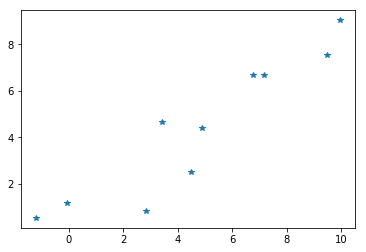

In [24]:
plt.plot(x_data,y_label,'*')

## Variables

In [25]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [26]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

## Cost function

In [32]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x +b
    error += (y-y_hat)**2

## Optimizer

In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## Initialize Variables

In [34]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
    
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

In [41]:
final_slope

0.75350869

In [42]:
final_intercept

0.83729243

## Evaluate Results

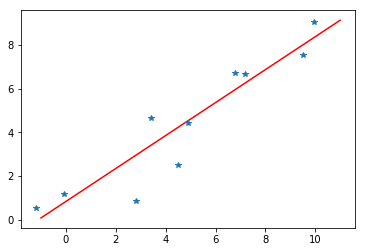

In [43]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')